In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [178]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [179]:
Patients_df = pd.read_csv('Patients.csv')

In [180]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
Patients_df['Gender']= label.fit_transform(Patients_df['Gender']) 
print(Patients_df['Gender'].unique())

[1 0]


In [181]:
label = preprocessing.LabelEncoder() 
 
Patients_df['Location']= label.fit_transform(Patients_df['Location']) 
print(Patients_df['Location'].unique())

[0 2 1]


In [182]:
label = preprocessing.LabelEncoder() 
 
Patients_df['SelfAssessedHealthStatus']= label.fit_transform(Patients_df['SelfAssessedHealthStatus']) 
print(Patients_df['SelfAssessedHealthStatus'].unique())

[0 1 2 3]


In [126]:
from sklearn.preprocessing import OneHotEncoder
Gender = ['Female', 'Male']
Location = ['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"]
SelfAssessedHealthStatus = ['Fair', 'Good', 'Excellent','Poor']
enc = preprocessing.OneHotEncoder(categories=[Gender,Location,SelfAssessedHealthStatus])
X = [['Male', 'County General Hospital', 'Fair'], ['Female', 'VA Hospital', 'Good']]
enc.fit(X)
OneHotEncoder(categories=[['Female', 'Male'],
                          ['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"],
                          ['Fair', 'Good', 'Excellent']])
enc.transform([['Female', 'VA Hospital', 'Good']]).toarray()


array([[1., 0., 0., 1., 0., 0., 1., 0., 0.]])

In [183]:
del Patients_df['Diastolic']

In [184]:
del Patients_df['LastName']

In [129]:
enc = preprocessing.OneHotEncoder()
enc.fit(Patients_df[['Location']])
enc.categories_
one_hot = enc.transform(Patients_df[['Location']]).toarray()
one_hot
Patients_df[['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"]] = one_hot

In [130]:
enc = preprocessing.OneHotEncoder()
enc.fit(Patients_df[['SelfAssessedHealthStatus']])
enc.categories_
one_hot = enc.transform(Patients_df[['SelfAssessedHealthStatus']]).toarray()
one_hot
Patients_df[['Excellent', 'Fair', 'Good', 'Poor']] = one_hot

In [185]:
Patients_df

,Age,Gender,Height,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,1,71,0,0,1,124,176
1,43,1,69,2,1,0,109,163
2,38,0,64,1,2,0,125,131
3,40,0,67,2,1,0,117,133
4,49,0,64,0,2,0,122,119
...,...,...,...,...,...,...,...,...
95,25,1,69,0,2,1,128,171
96,44,1,69,2,2,1,124,188
97,49,1,70,0,1,0,119,186
98,45,1,68,0,2,1,136,172


In [ ]:
# Create inputs and targets

inputs, targets = Patients_df[['Age', 'Weight', 'Smoker','Gender', 'County General Hospital','VA Hospital',"St. Mary's Medical Center", 'Excellent','Good', 'Fair',	'Poor' ]], Patients_df['Systolic']

# Create and train the model
model = LinearRegression().fit(inputs, targets)


# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
numeric_cols = ['Age', 'Weight', 'Height'] 
scaler = StandardScaler()
scaler.fit(Patients_df[numeric_cols])
scaled_inputs = scaler.transform(Patients_df[numeric_cols])
scaled_inputs

array([[-0.0390013 ,  0.83212833,  1.39250555],
       [ 0.65745049,  0.34041613,  0.68385132],
       [-0.0390013 , -0.86995234, -1.08778423],
       [ 0.23957941, -0.79430431, -0.0248029 ],
       [ 1.49319263, -1.32384052, -1.08778423],
       [ 1.07532156, -0.45388818,  0.32952421],
       [-0.73545309, -0.45388818, -1.08778423],
       [ 0.23957941,  0.98342439,  0.32952421],
       [-1.43190487,  1.09689643,  0.32952421],
       [-1.0140338 , -0.83212833, -0.37913001],
       [ 0.9360312 , -0.98342439,  0.32952421],
       [ 0.51816013, -0.64300825, -0.37913001],
       [-1.84977594,  0.7564803 ,  1.39250555],
       [ 0.10028906,  1.81555271,  1.74683266],
       [-0.31758201, -0.94560037, -0.73345712],
       [ 1.35390227,  1.0212484 ,  1.39250555],
       [-0.87474344,  1.39948855,  0.68385132],
       [-1.57119523, -0.86995234,  0.68385132],
       [-0.17829166,  0.94560037,  1.03817844],
       [ 1.63248299,  0.68083227,  0.32952421],
       [ 1.35390227, -0.79430431, -0.733

In [104]:
cat_cols = ['Gender','Smoker','County General Hospital','VA Hospital',"St. Mary's Medical Center", 'Excellent','Good', 'Fair',	'Poor']
categorical_data = Patients_df[cat_cols].values

In [99]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = Patients_df.Systolic

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

NameError: ignored

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

In [190]:
Patients_df

,Age,Gender,Height,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,1,71,0,0,1,124,176
1,43,1,69,2,1,0,109,163
2,38,0,64,1,2,0,125,131
3,40,0,67,2,1,0,117,133
4,49,0,64,0,2,0,122,119
...,...,...,...,...,...,...,...,...
95,25,1,69,0,2,1,128,171
96,44,1,69,2,2,1,124,188
97,49,1,70,0,1,0,119,186
98,45,1,68,0,2,1,136,172


In [132]:
Patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        100 non-null    int64  
 1   Gender                     100 non-null    int64  
 2   Height                     100 non-null    int64  
 3   Location                   100 non-null    int64  
 4   SelfAssessedHealthStatus   100 non-null    int64  
 5   Smoker                     100 non-null    int64  
 6   Systolic                   100 non-null    int64  
 7   Weight                     100 non-null    int64  
 8   County General Hospital    100 non-null    float64
 9   VA Hospital                100 non-null    float64
 10  St. Mary's Medical Center  100 non-null    float64
 11  Excellent                  100 non-null    float64
 12  Fair                       100 non-null    float64
 13  Good                       100 non-null    float64


In [135]:
data = {'Location' : ['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"]
        }
df = pd.DataFrame(data,columns=['Location'])

print(df)
print(df.dtypes)

                    Location
0    County General Hospital
1                VA Hospital
2  St. Mary's Medical Center
Location    object
dtype: object


In [ ]:
'SelfAssessedHealthStatus' : ['Fair', 'Good', 'Excellent','Poor']

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Patients_df[['Age', 'Height',
     'Weight']] = scaler.fit_transform(Patients_df[['Age','Height',
      'Weight']])

In [192]:
Patients_df.head(5)


,Age,Gender,Height,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,-0.039001,1,1.392506,0,0,1,124,0.832128
1,0.657450,1,0.683851,2,1,0,109,0.340416
2,-0.039001,0,-1.087784,1,2,0,125,-0.869952
3,0.239579,0,-0.024803,2,1,0,117,-0.794304
4,1.493193,0,-1.087784,0,2,0,122,-1.323841


In [193]:
X = Patients_df.drop(['Systolic'], axis=1)
y = Patients_df['Systolic']

In [194]:
from sklearn.model_selection import train_test_split


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [196]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 51.40426808603669
Lasso Regression: R^2 score on test set 35.038955672806814


In [198]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [199]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

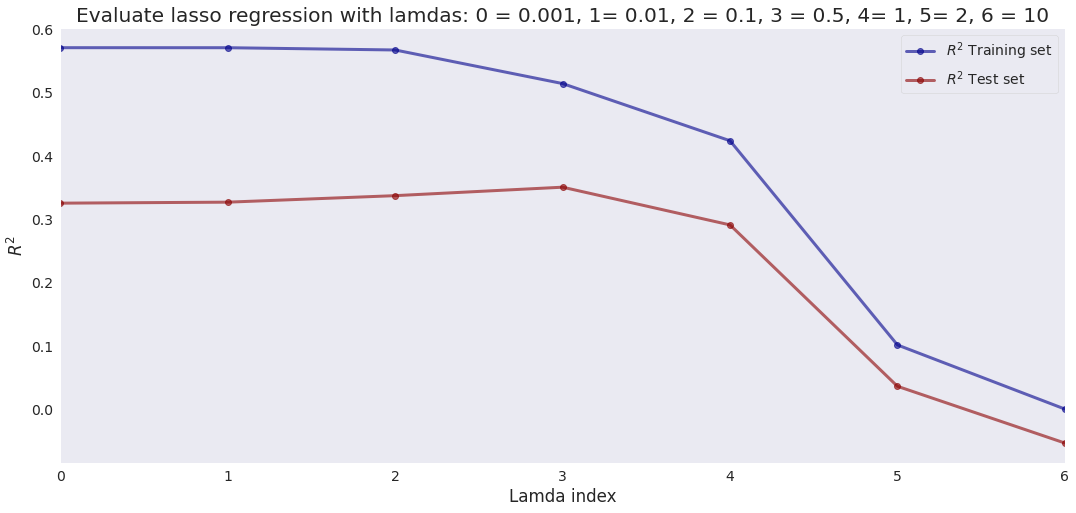

In [200]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [201]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    35.038956
lambda        0.500000
Name: 3, dtype: float64

In [202]:
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([ 1.14804079, -0.        ,  1.04777052, -0.13619896,  0.45499808,
        8.75319922, -0.9764929 ])

In [203]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

32.67545716126301

In [204]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [205]:
from sklearn.model_selection import cross_val_score


In [206]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=10, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

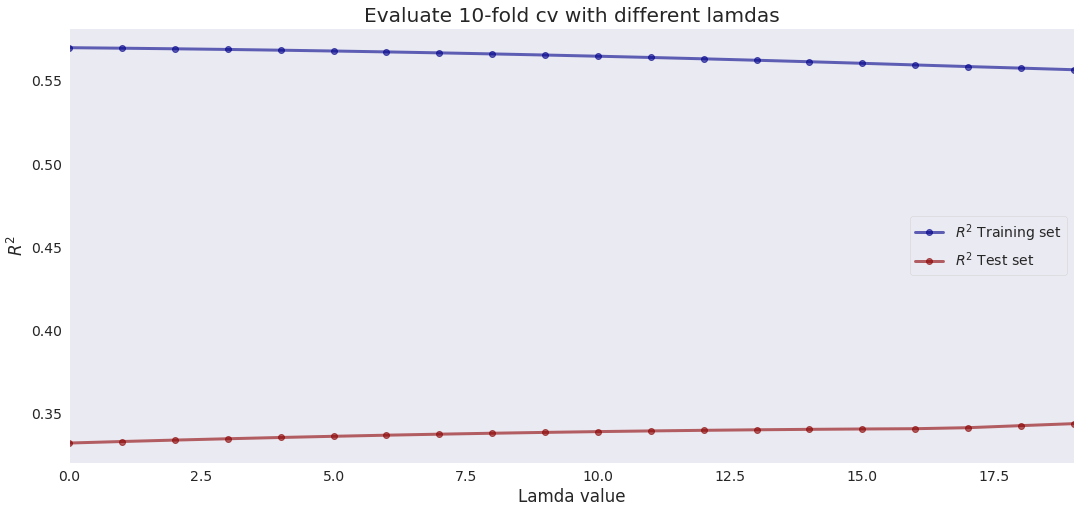

In [207]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 10-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()


In [208]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    34.376749
lambda        0.200000
Name: 19, dtype: float64

In [209]:
# Best Model
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg_best.predict(X_test))

32.54105584096965

In [211]:
reg_best.coef_

array([ 1.11565225, -0.        ,  0.87507912, -0.06084871,  0.41829045,
        8.571702  , -0.78587678])